## DATA CLEANING AND REGRESSION MODEL

In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn import linear_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
xlsx = pd.ExcelFile(r'C:\Users\Dummy\Desktop\projectdata.xlsx')
df1 = pd.read_excel(xlsx)
### RENAMING OF COLUMNS
df1=df1.rename(columns = {'X1':'Relative_Compactness','X2':'Surface_Area','X3':'Wall_Area','X4':'Roof_Area','X5':'Overall_Height',
                          'X6':'Orientation','X7':'Glazing_Area','X8':'Glazing_Area_Distribution','Y1':'Heating_Load',
                          'Y2':'cooling_Load'})
#glimpse of original data
print("\n-------------------------------------------------------Raw data------------------------------------------\n")
display(df1)
# converted strings into numeric value
df1['Overall_Height'].replace({'A' : 7, 'B' : 3.5}, inplace = True)
df1['Glazing_Area'].replace({'a' : 0, 'h' : 0.1,'s': 0.25,'f':0.4}, inplace = True)
df1['Glazing_Area_Distribution'].replace({'z' : 0, 'o' : 1,'t': 2,'th':3,'fr':4,'fv':5}, inplace = True)
df1.head()
# filling the missing value
df1 = df1.fillna(df1.mean())
# after data cleaning


print("\n\n\n-----------------------------------------------Processed data after cleaning------------------------------------------\n")
print("\n\n\n\n\n")
display(df1)

#converting all column values to integer
df1['Relative_Compactness']=df1.Relative_Compactness.astype('int64')
df1['Surface_Area']=df1.Surface_Area.astype('int64')
df1['Wall_Area']=df1.Wall_Area.astype('int64')
df1['Roof_Area']=df1.Roof_Area.astype('int64')
df1['Overall_Height']=df1.Overall_Height.astype('int64')
df1['Orientation']=df1.Orientation.astype('int64')
df1['Glazing_Area']=df1.Glazing_Area.astype('int64')
df1['Glazing_Area_Distribution']=df1.Glazing_Area_Distribution.astype('int64')
df1['Heating_Load']=df1.Heating_Load.astype('int64')
df1['cooling_Load']=df1.cooling_Load.astype('int64')
df1

print("------------------------------------------ALGORITHM PREDICTING VALUES USING MULTIPLE REGRESSION------------------------------------")
#multiple regression model
X = df1[['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height','Orientation','Glazing_Area','Glazing_Area_Distribution']]
y = df1['Heating_Load']
a=int(input("Enter Relative compactness:"))
b=int(input("Enter surface area:"))
c=int(input("Enter wall area:"))
d=int(input("Enter roof area:"))
e=int(input("Enter overall height:"))
f=int(input("Enter orientation:"))
g=int(input("Enter glazing area:"))
h=int(input("Enter glazing area distribution:"))

r = linear_model.LinearRegression()
r.fit(X, y)
predictedval = r.predict([[a,b,c,d,e,f,g,h]])
print('\n\n\n\nThe predicated value of Heating Load using regression algorithm is:',predictedval)


X = df1[['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height','Orientation','Glazing_Area','Glazing_Area_Distribution']]
y = df1['cooling_Load']
r = linear_model.LinearRegression()
r.fit(X, y)
predictedval = r.predict([[a,b,c,d,e,f,g,h]])
print('\nThe predicated value of cooling Load using regression algorithm is:',predictedval)



array = df1.values
X = array[:,0:4]
Y = array[:,4]

t_size = 0.20 
seed = 7 
a, b, c, d = train_test_split(X, Y, test_size=t_size,random_state=seed)

print("\n\n------------------------------CHECKING THE ACCURACY OF PREDICTED VALUES USING ENTROPY AND GINI:---------------------------------")


### USING ENTROPY
dt=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
dt.fit(a,c)
predictions = dt.predict(b)
print("\n\n\nPredicted accuracy using entropy:",(accuracy_score(d, predictions))) 


#USING ENTROPY
dt=DecisionTreeClassifier(criterion='gini',ccp_alpha=0.015)
dt.fit(a,c)
predictions = dt.predict(b)
print("\n\n\nPredicted accuracy using gini:",(accuracy_score(d, predictions))) 






-------------------------------------------------------Raw data------------------------------------------



,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,cooling_Load
0,0.98,NaN,294.0,110.25,A,2,a,z,15.55,21.33
1,0.98,514.5,294.0,110.25,A,3,a,z,NaN,21.33
2,0.98,NaN,294.0,110.25,A,4,a,z,15.55,21.33
3,0.98,514.5,294.0,110.25,A,5,a,z,NaN,21.33
4,0.90,NaN,318.5,122.50,A,2,a,z,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,B,5,f,fv,17.88,21.40
764,0.62,808.5,367.5,220.50,B,2,f,fv,16.54,16.88
765,0.62,808.5,367.5,220.50,B,3,f,fv,16.44,17.11
766,0.62,808.5,367.5,220.50,B,4,f,fv,16.48,16.61





-----------------------------------------------Processed data after cleaning------------------------------------------









,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,cooling_Load
0,0.98,672.59252,294.0,110.25,7.0,2,0.0,0,15.550000,21.33
1,0.98,514.50000,294.0,110.25,7.0,3,0.0,0,22.329668,21.33
2,0.98,672.59252,294.0,110.25,7.0,4,0.0,0,15.550000,21.33
3,0.98,514.50000,294.0,110.25,7.0,5,0.0,0,22.329668,21.33
4,0.90,672.59252,318.5,122.50,7.0,2,0.0,0,20.840000,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.00000,343.0,220.50,3.5,5,0.4,5,17.880000,21.40
764,0.62,808.50000,367.5,220.50,3.5,2,0.4,5,16.540000,16.88
765,0.62,808.50000,367.5,220.50,3.5,3,0.4,5,16.440000,17.11
766,0.62,808.50000,367.5,220.50,3.5,4,0.4,5,16.480000,16.61


------------------------------------------ALGORITHM PREDICTING VALUES USING MULTIPLE REGRESSION------------------------------------
Enter Relative compactness:1
Enter surface area:2
Enter wall area:3
Enter roof area:4
Enter overall height:5
Enter orientation:6
Enter glazing area:7
Enter glazing area distribution:8




The predicated value of Heating Load using regression algorithm is: [6.52076501]

The predicated value of cooling Load using regression algorithm is: [5.80200362]


------------------------------CHECKING THE ACCURACY OF PREDICTED VALUES USING ENTROPY AND GINI:---------------------------------



Predicted accuracy using entropy: 1.0



Predicted accuracy using gini: 1.0


## RANDOM FOREST  ALGORITHM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df1.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,cooling_Load
0,0,672,294,110,7,2,0,0,15,21
1,0,514,294,110,7,3,0,0,22,21
2,0,672,294,110,7,4,0,0,15,21
3,0,514,294,110,7,5,0,0,22,21
4,0,672,318,122,7,2,0,0,20,28


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = df1.iloc[:, 0:4].values
y = df1.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#SCALING
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Training
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("THe accuracy of prediction in this algo is:",accuracy_score(y_test, y_pred))



[[72  0]
 [ 0 82]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        82

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

THe accuracy of prediction in this algo is: 1.0


## K-MEANS ALGORITHM

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df1.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,cooling_Load
0,0,672,294,110,7,2,0,0,15,21
1,0,514,294,110,7,3,0,0,22,21
2,0,672,294,110,7,4,0,0,15,21
3,0,514,294,110,7,5,0,0,22,21
4,0,672,318,122,7,2,0,0,20,28


Text(0, 0.5, 'Inertia')

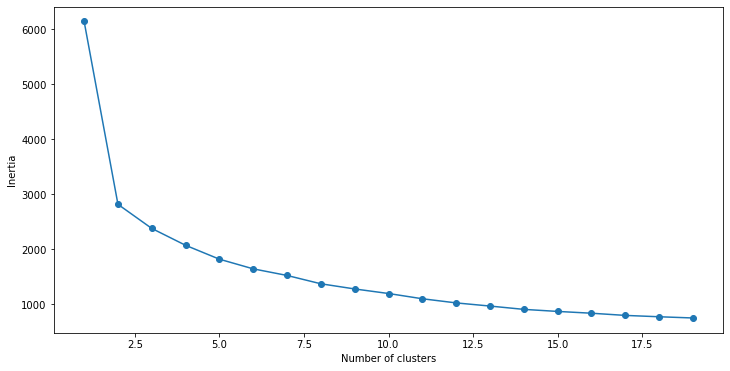

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1)
pd.DataFrame(data_scaled)
pd.DataFrame(data_scaled).describe()

SSE = []   
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [ ]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 

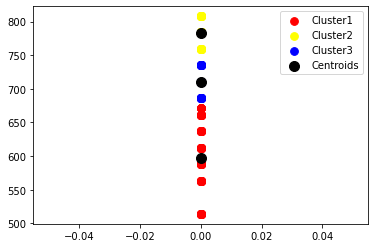

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'yellow', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'blue', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend() 
plt.show()

## NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
array = df1.values
X = array[:,0:4]
Y = array[:,4]

t_size = 0.20 
seed = 7 
a, b, c, d = train_test_split(X, Y, test_size=t_size,random_state=seed)

# Naive Bayes Algorithm
nb = GaussianNB() #ccp_alpha is pruning parameter   
nb.fit(a, c)      # training the model
predictions = nb.predict(b)  # now testing on test data to get class of test data
print("Predicted accuracy using naive bayes algorithm is:",(accuracy_score(d, predictions)))

Predicted accuracy using naive bayes algorithm is: 1.0


## STATISTICAL CALCULATIONS

In [ ]:
import pandas as pd
from sklearn import linear_model
xlsx = pd.ExcelFile(r'C:\Users\haiqa\Downloads\projectdata1.xlsx')
df1 = pd.read_excel(xlsx)
import statistics
df1=df1.rename(columns = {'X1':'Relative_Compactness','X2':'Surface_Area','X3':'Wall_Area','X4':'Roof_Area','X5':'Overall_Height',
                          'X6':'Orientation','X7':'Glazing_Area','X8':'Glazing_Area_Distribution','Y1':'Heating_Load',
                          'Y2':'cooling_Load'})
df1.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
#for heating load
print("Mean value for heating loads is ",statistics.mean(df1['Heating Load']))
print("Median value for heating loads is ",statistics.median(df1['Heating Load']))
print("Mode value for heating loads is ",statistics.mode(df1['Heating Load']))
print("Lower quartile for heating loads is ",statistics.median_low(df1['Heating Load']))
print("Higher quartile for heating loads is ",statistics.median_high(df1['Heating Load']))
print("Interquartile range for heating loads is ",statistics.median_high(df1['Heating Load'])-statistics.median_low(df1['Heating Load']))
print("Standard deviation for heating loads is ",statistics.stdev(df1['Heating Load']))
print("Variance for heating loads is ",statistics.variance(df1['Heating Load']),"\n")

#for cooling load
print("Mean value for cooling loads is ",statistics.mean(df1['cooling Load']))
print("Median value for cooling loads is ",statistics.median(df1['cooling Load']))
print("Mode value for cooling loads is ",statistics.mode(df1['cooling Load']))
print("Lower quartile for cooling loads is ",statistics.median_low(df1['cooling Load']))
print("Higher quartile for cooling loads is ",statistics.median_high(df1['cooling Load']))
print("Interquartile range for cooling loads is ",statistics.median_high(df1['cooling Load'])-statistics.median_low(df1['cooling Load']))
print("Standard deviation for cooling loads is ",statistics.stdev(df1['cooling Load']))
print("Variance for cooling loads is ",statistics.variance(df1['cooling Load']),"\n")

#the correlation and covariance functions of the statistics library are only supported by the latest version
#print("Covariance of the heating and cooling loads is ",statistics.covariance(df1['Heating_Load'],df1['cooling_Load']))
#print("Correlation of the heating and cooling loads is ",statistics.correlation(df1['Heating_Load'],df1['cooling_Load']))



Mean value for heating loads is  22.3071953125
Median value for heating loads is  18.95
Mode value for heating loads is  15.16
Lower quartile for heating loads is  18.9
Higher quartile for heating loads is  19.0
Interquartile range for heating loads is  0.10000000000000142
Standard deviation for heating loads is  10.090203970187025
Variance for heating loads is  101.81221615997801 

Mean value for cooling loads is  24.587760416666665
Median value for cooling loads is  22.08
Mode value for cooling loads is  21.33
Lower quartile for cooling loads is  22.07
Higher quartile for cooling loads is  22.09
Interquartile range for cooling loads is  0.019999999999999574
Standard deviation for cooling loads is  9.513305562326169
Variance for cooling loads is  90.502982722186 



In [ ]:
df1.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Orientation,Heating_Load,cooling_Load
count,768.000000,762.000000,768.000000,768.000000,768.000000,764.000000,768.000000
mean,0.764167,672.592520,318.500000,176.604167,3.500000,22.329668,24.587760
std,0.105777,87.806705,43.626481,45.165950,1.118763,10.110119,9.513306
min,0.620000,514.500000,245.000000,110.250000,2.000000,6.010000,10.900000
25%,0.682500,612.500000,294.000000,140.875000,2.750000,12.970000,15.620000
50%,0.750000,686.000000,318.500000,183.750000,3.500000,18.950000,22.080000
75%,0.830000,759.500000,343.000000,220.500000,4.250000,31.720000,33.132500
max,0.980000,808.500000,416.500000,220.500000,5.000000,43.100000,48.030000


## VISUALIZATION

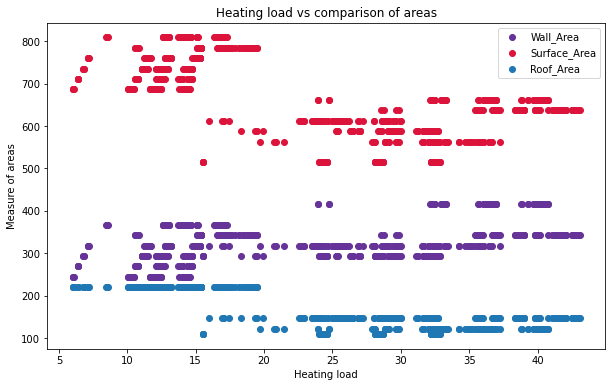

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df1['Heating Load'],df1['Wall Area'],label="Wall_Area",color="rebeccapurple")
plt.scatter(df1['Heating Load'],df1['Surface Area'],label="Surface_Area",color="crimson")
plt.scatter(df1['Heating Load'],df1['Roof Area'],label="Roof_Area")
plt.legend()
plt.xlabel("Heating load")
plt.ylabel("Measure of areas")
plt.title("Heating load vs comparison of areas")
plt.show()

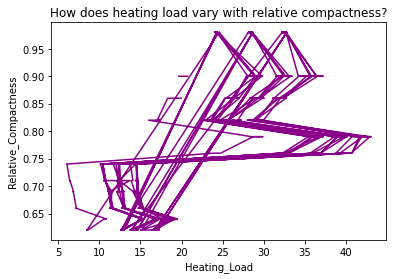

In [ ]:
plt.plot(df1['Heating_Load'],df1['Relative_Compactness'],color="darkmagenta")
plt.xlabel("Heating_Load")
plt.ylabel("Relative_Compactness")
plt.title("How does heating load vary with relative compactness?")
plt.show()

Text(0.5, 1.0, 'Depicting how glazing area distribution is being varied')

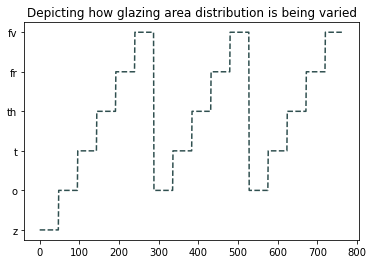

In [ ]:
x=range(768)
plt.plot(x,df1['Glazing_Area_Distribution'],linestyle="--",color="darkslategrey")
plt.title("Depicting how glazing area distribution is being varied")

<function matplotlib.pyplot.show(*args, **kw)>

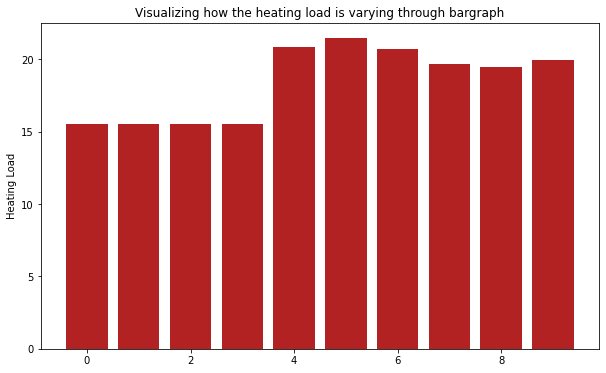

In [ ]:
plt.figure(figsize=(10,6))
x=range(10)
y=pd.DataFrame(df1.head(10))
plt.bar(x,y['Heating Load'],color="firebrick")
plt.ylabel("Heating Load")
plt.title("Visualizing how the heating load is varying through bargraph")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

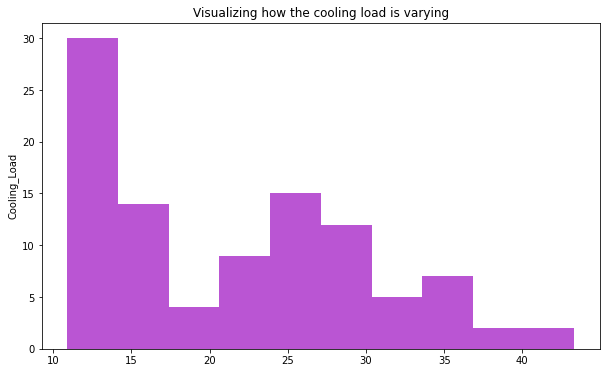

In [ ]:
plt.figure(figsize=(10,6))
y=pd.DataFrame(df1.head(100))
plt.hist(y['cooling_Load'],color="mediumorchid")
plt.ylabel("Cooling_Load")
plt.title("Visualizing how the cooling load is varying")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

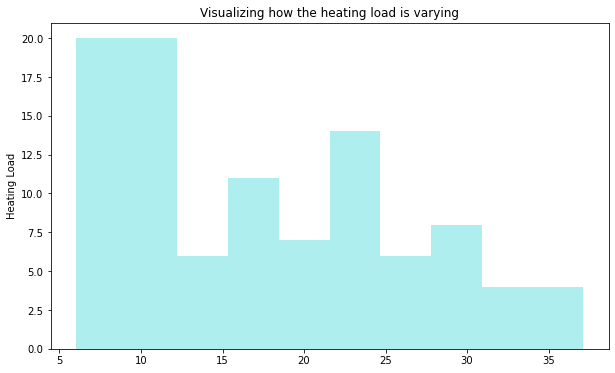

In [ ]:
plt.figure(figsize=(10,6))
y=pd.DataFrame(df1.head(100))
plt.hist(y['Heating Load'],color="paleturquoise")
plt.ylabel("Heating Load")
plt.title("Visualizing how the heating load is varying")
plt.show

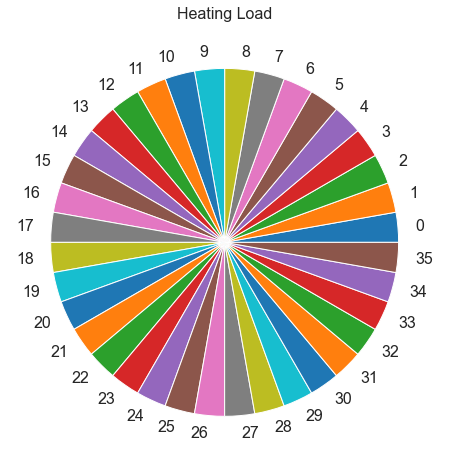

In [ ]:
df1 = df1.groupby('Heating_Load').size()

# Make the plot with pandas
df1.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Heating Load")
plt.ylabel("")
plt.show()

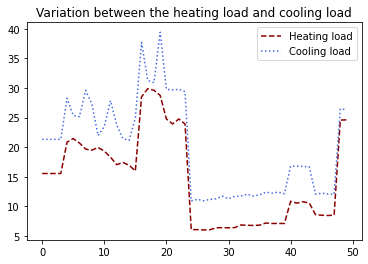

In [ ]:
plt.plot(df1['Heating Load'].head(50),color='darkred',linestyle='dashed')
plt.plot(df1['cooling Load'].head(50),color='royalblue',linestyle='dotted')
plt.title("Variation between the heating load and cooling load")
plt.legend(['Heating load','Cooling load'])
plt.show()

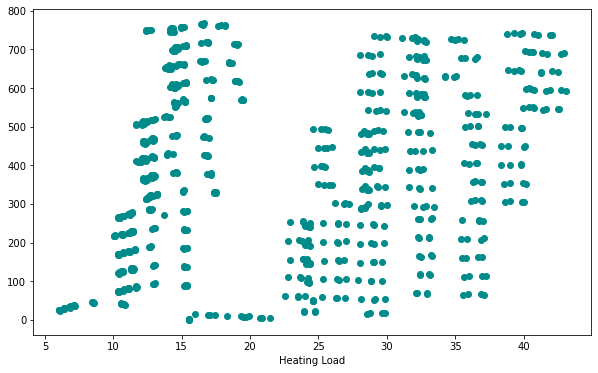

In [ ]:
plt.figure(figsize=(10,6))
y=range(768)
plt.scatter(df1['Heating Load'],y,color='darkcyan')
plt.xlabel("Heating Load")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

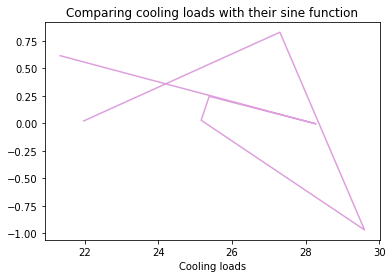

In [ ]:
import numpy as np
plt.plot(df1['cooling Load'].head(10),np.sin(df1['cooling Load'].head(10)),color="plum")
plt.title("Comparing cooling loads with their sine function")
plt.xlabel("Cooling loads")
plt.show

Numpy functions

In [ ]:
import numpy as np
# here we demonstrate how various numpy functions work without altering the original data

# rounding values as preference
x=np.around(df1['Roof Area'],1)
y=np.floor(df1['Heating Load'])
z=np.ceil(df1['cooling Load'])
print("Rounding roof area to 1 decimal place")
print(x.head(),"\n")
print("Getting floor of heating load")
print(y.head(),'\n')
print("Getting ceiling of cooling load")
print(z.head(),'\n')

# using arithmetic functions
a=np.add(df1['Wall Area'],df1['Roof Area'])
m=np.mod(df1['Surface Area'],df1['Overall Height'])
p=np.power(df1['Orientation'],2)
print("Adding wall area and roof area")
print(a.head,'\n')
print("Getting remainder of Surface Area/Overall height")
print(m.head(),'\n')
print("Raising orientation to the power of 2")
print(p.head(),'\n')

#using statistical functions
med=np.median(df1['Heating Load'])
print("Median of heating load is ",med,'\n')
avg=np.average(df1['cooling Load'])
print("Average value of cooling load is ",avg,'\n')
s=np.std(df1['Heating Load'])
print("Standard deviation of heating load is ",s,'\n')
df1.head()

Rounding roof area to 1 decimal place
0    110.2
1    110.2
2    110.2
3    110.2
4    122.5
Name: Roof Area, dtype: float64 

Getting floor of heating load
0    15.0
1    15.0
2    15.0
3    15.0
4    20.0
Name: Heating Load, dtype: float64 

Getting ceiling of cooling load
0    22.0
1    22.0
2    22.0
3    22.0
4    29.0
Name: cooling Load, dtype: float64 

Adding wall area and roof area
<bound method NDFrame.head of 0      404.25
1      404.25
2      404.25
3      404.25
4      441.00
        ...  
763    563.50
764    588.00
765    588.00
766    588.00
767    588.00
Length: 768, dtype: float64> 

Getting remainder of Surface Area/Overall height
0    3.5
1    3.5
2    3.5
3    3.5
4    3.5
dtype: float64 

Raising orientation to the power of 2
0     4
1     9
2    16
3    25
4     4
Name: Orientation, dtype: int64 

Median of heating load is  18.95 

Average value of cooling load is  24.58776041666667 

Standard deviation of heating load is  10.08363268719098 



,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
